In [1]:
from datetime import datetime, timedelta
codes = {'161005.XSHE': '富国天惠', '163407.XSHE':'兴全沪深300指数'}
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)

In [2]:
df = get_extras('acc_net_value', codes.keys(), start_date, end_date, df=True,count=None)
df.head()

,161005.XSHE,163407.XSHE
2012-02-22,3.0480,0.8469
2012-02-23,3.0559,0.8505
2012-02-24,3.0731,0.8641
2012-02-27,3.0768,0.8662
2012-02-28,3.0754,0.8672


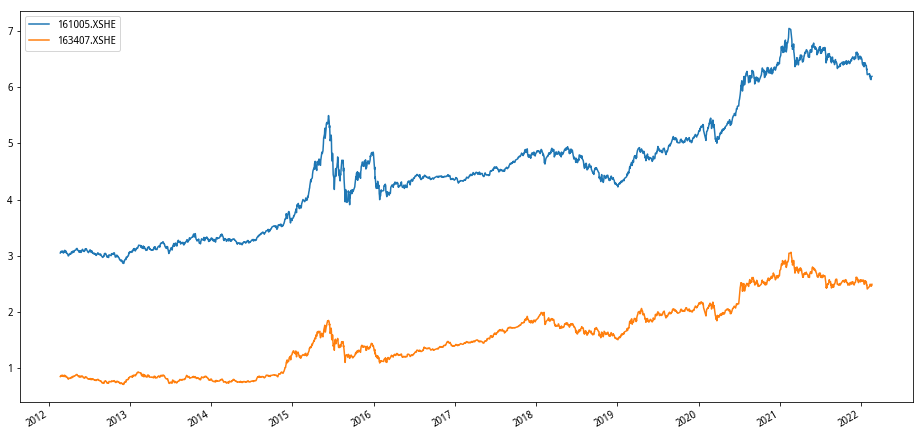

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16,8)
df.plot()

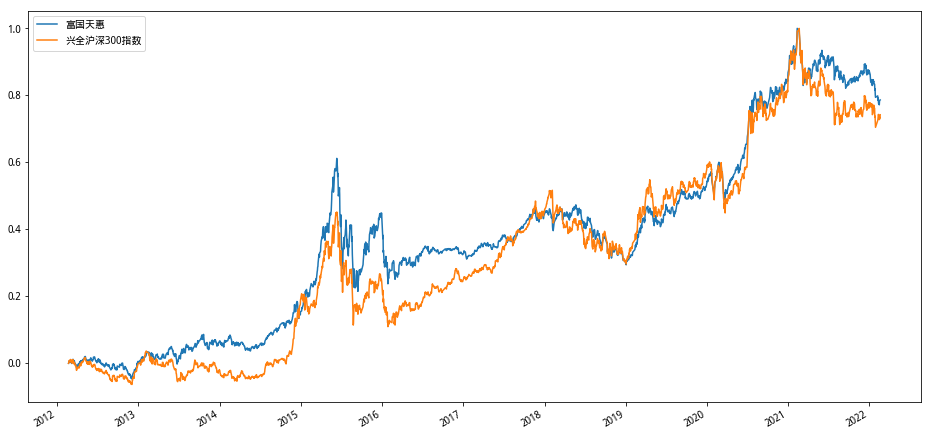

In [6]:
# 归一化
for k, v in codes.items():
    df[v] =  (df[k]-df[k].iloc[0])/(df[k].max()-df[k].iloc[0])
df[list(codes.values())].plot()

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(){return false}  

<IPython.core.display.Javascript object>

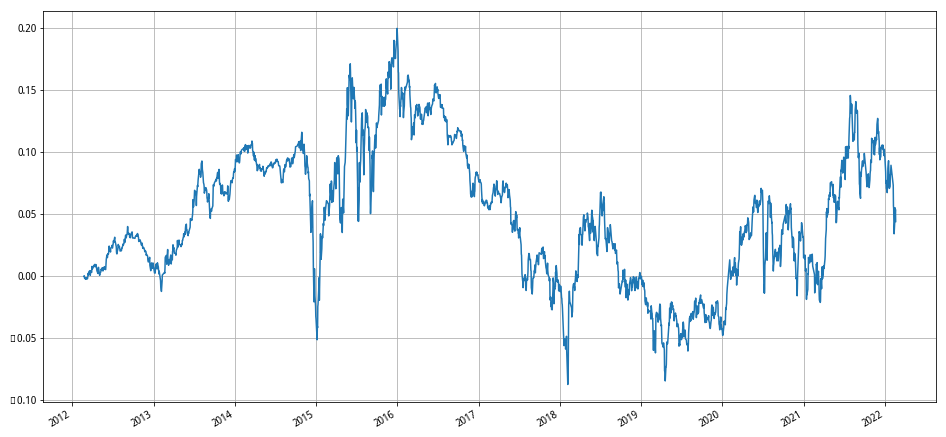

In [76]:
df['富国天惠超额收益'] = (df['富国天惠']-df['兴全沪深300指数'])
df['富国天惠超额收益'].plot(grid=True)

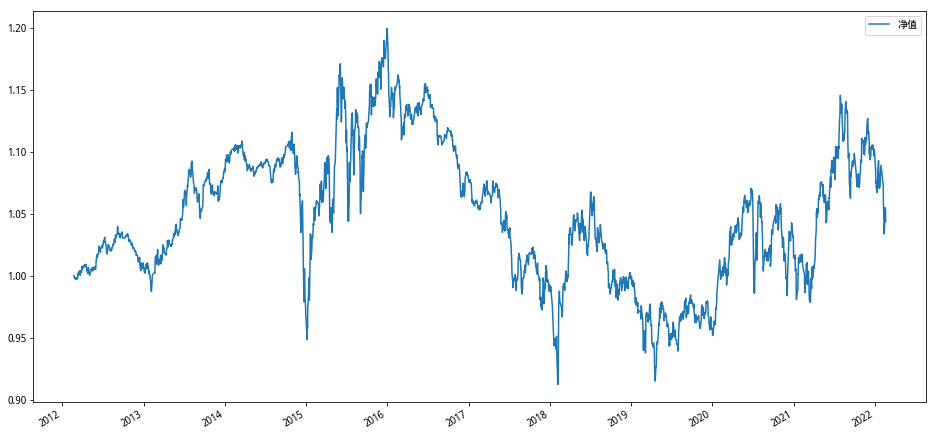

In [74]:
df['净值'] =1
df['净值'] = df['净值'].shift(1).fillna(1) * (1+df['富国天惠超额收益'])
df[['净值']].plot()